In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sah = pd.read_excel("../data/Sa_table_h.xlsx",index_col=0).sort_values(["STAID","EQID"]).reset_index(drop=True)
sav = pd.read_excel("../data/Sa_table_v.xlsx",index_col=0).sort_values(["STAID","EQID"]).reset_index(drop=True)

In [3]:
stal = list(sah.STAID.unique())
print(len(sah),len(sav))

1164 1164


Match!


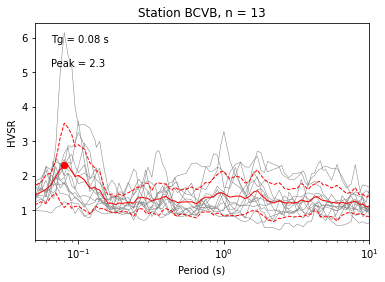

Match!


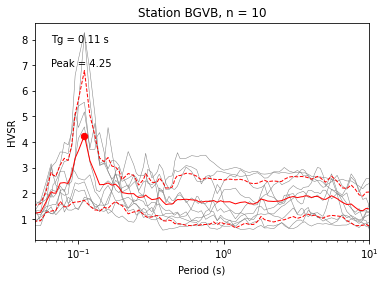

Match!


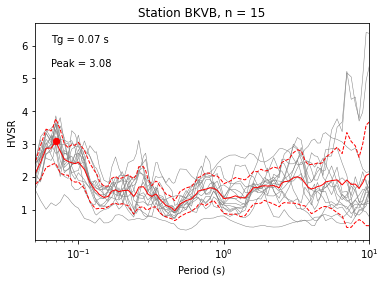

Match!


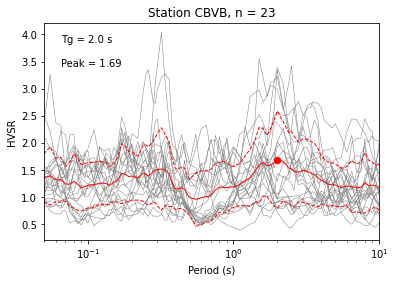

Match!


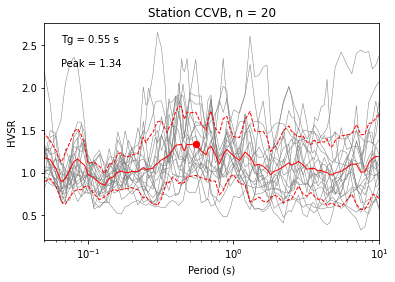

Match!


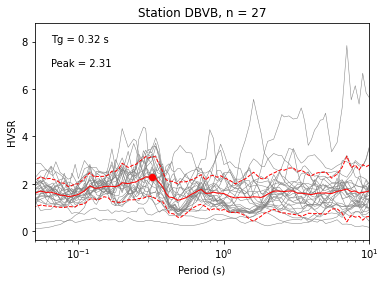

Match!


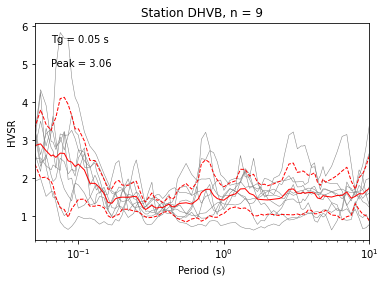

Match!


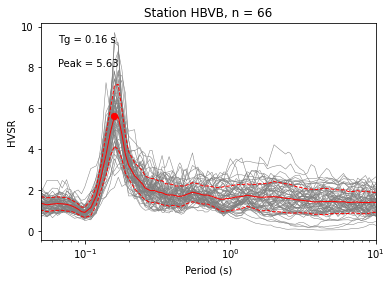

Match!


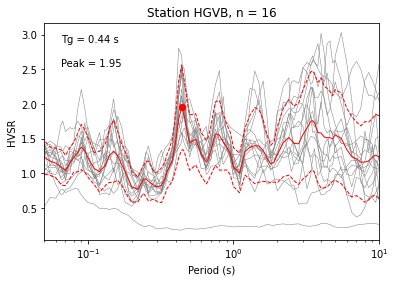

Match!


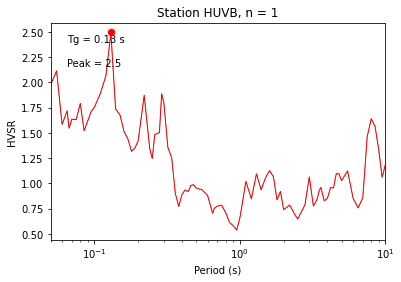

Match!


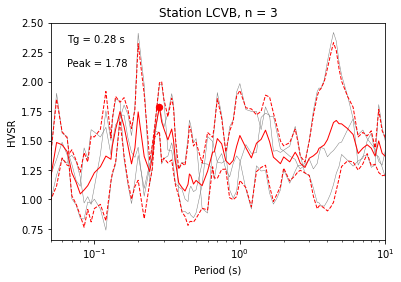

Match!


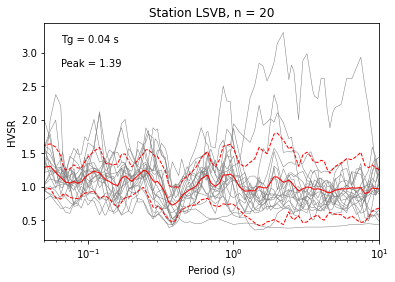

Match!


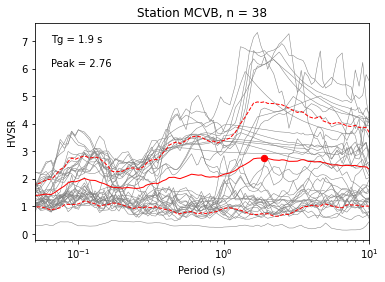

Match!


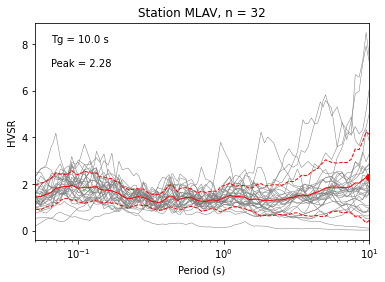

Match!


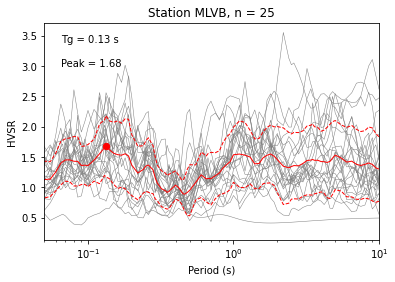

Match!


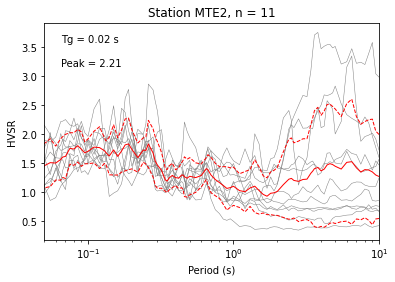

Match!


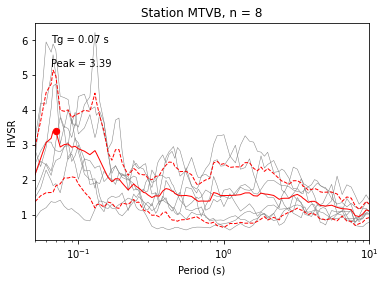

Match!


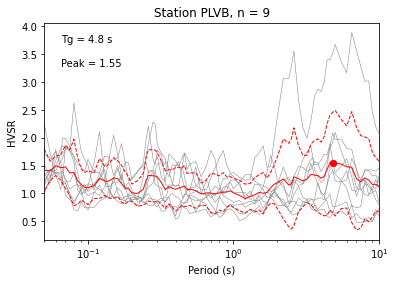

Match!


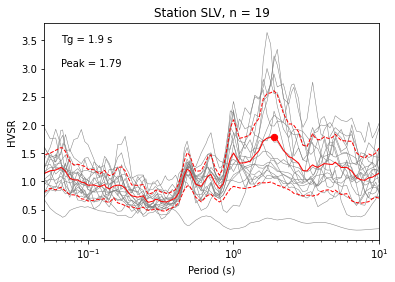

Match!


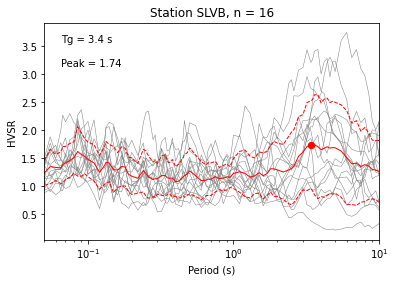

Match!


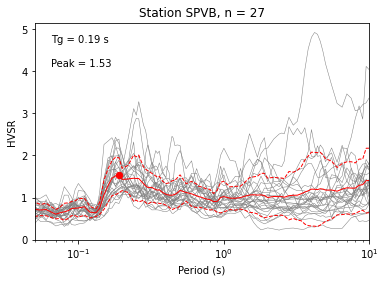

Match!


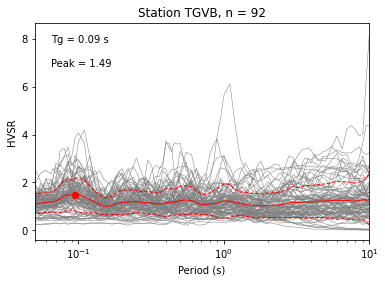

Match!


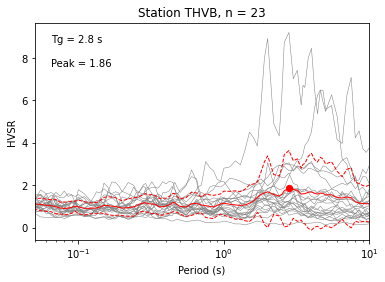

Match!


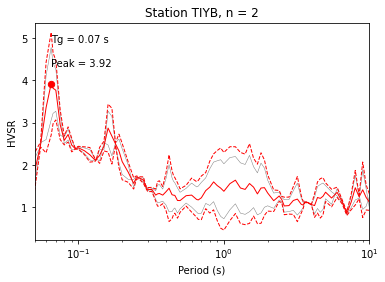

Match!


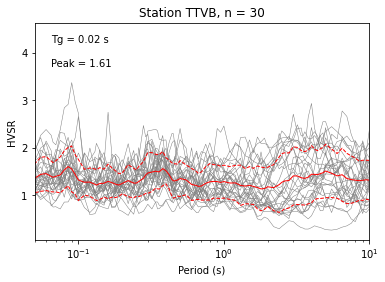

Match!


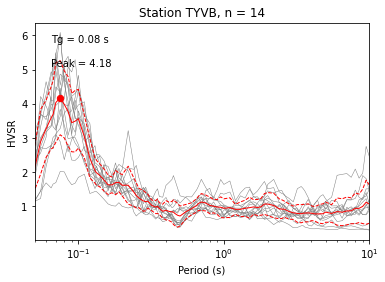

Match!


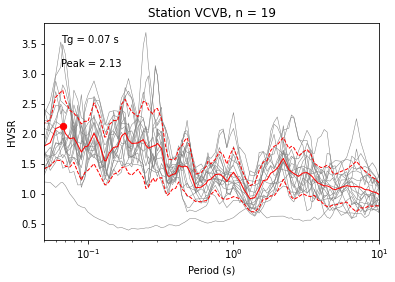

Match!


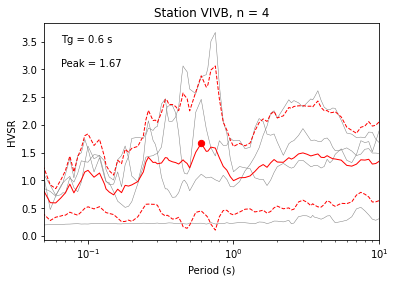

Match!


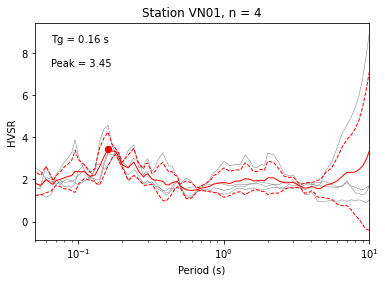

Match!


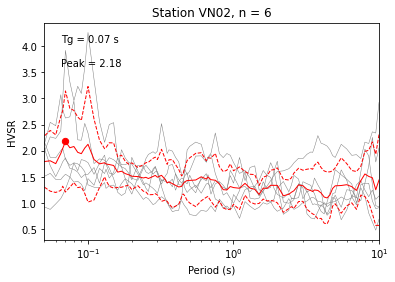

Match!


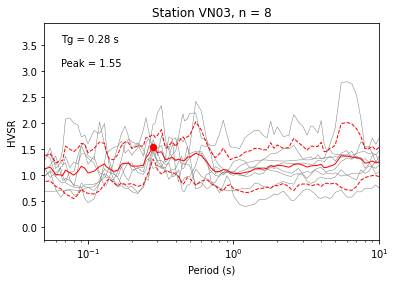

Match!


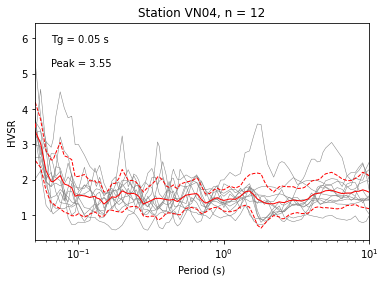

Match!


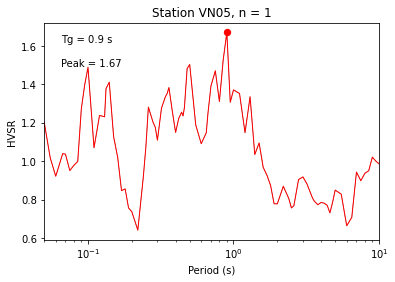

Match!


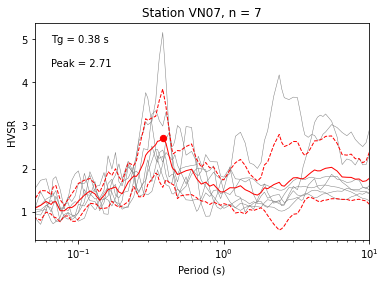

Match!


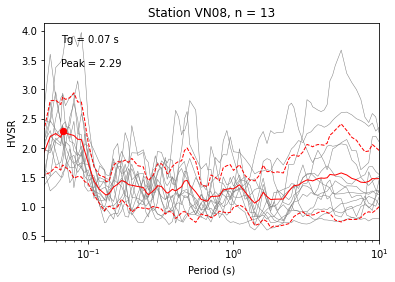

Match!


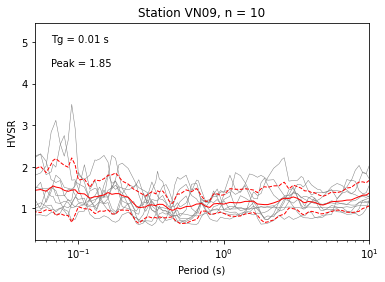

Match!


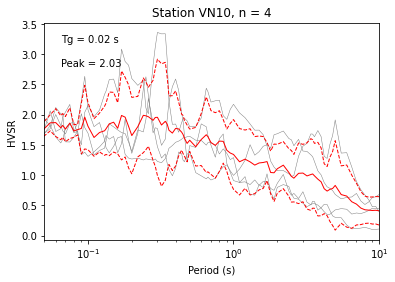

Match!


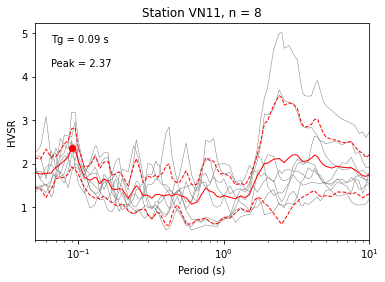

Match!


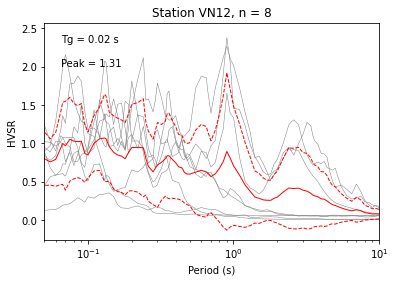

Match!


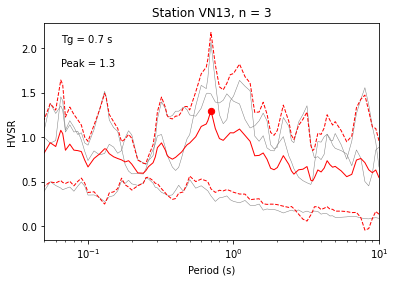

Match!


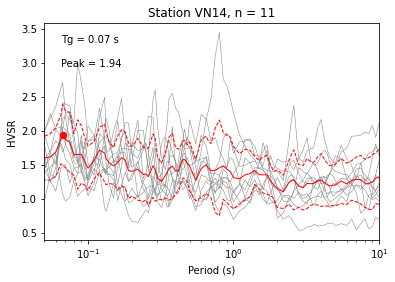

Match!


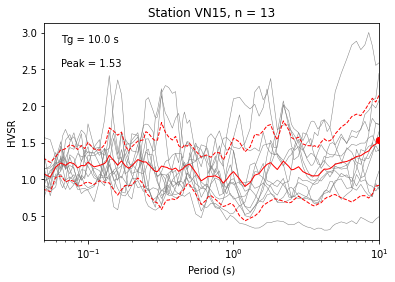

Match!


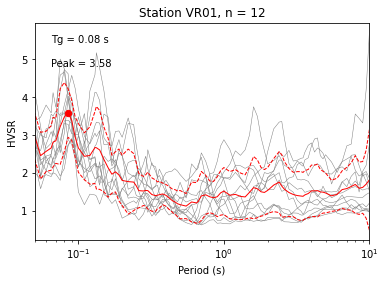

Match!


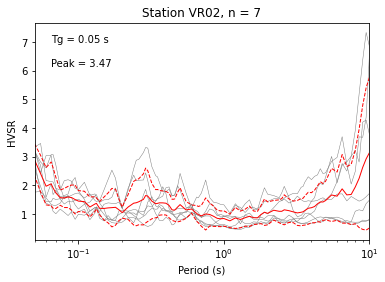

Match!


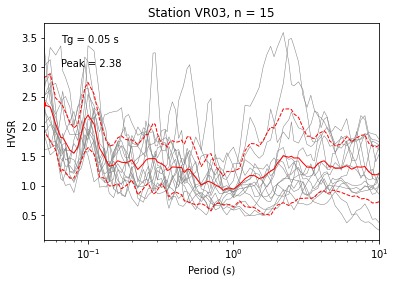

Match!


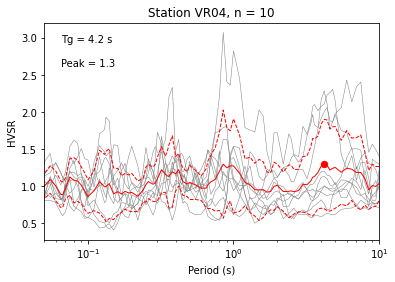

Match!


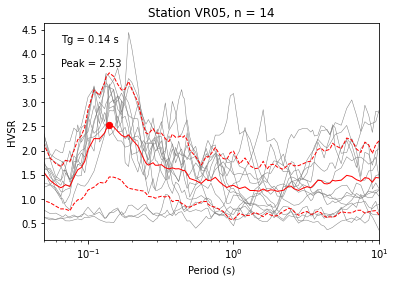

Match!


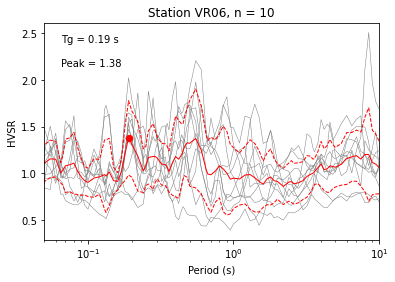

Match!


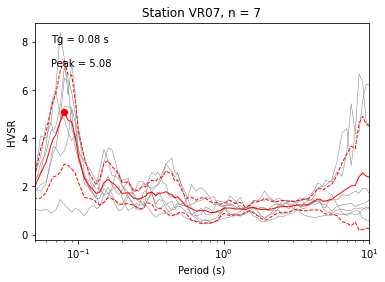

Match!


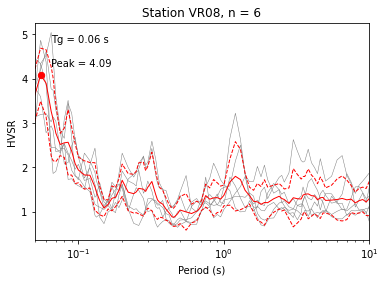

Match!


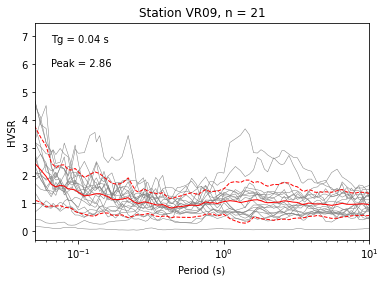

Match!


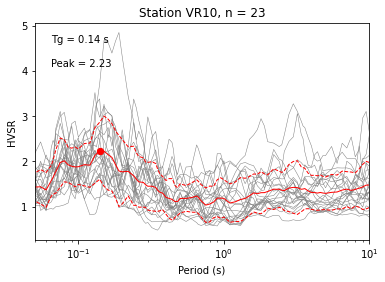

Match!


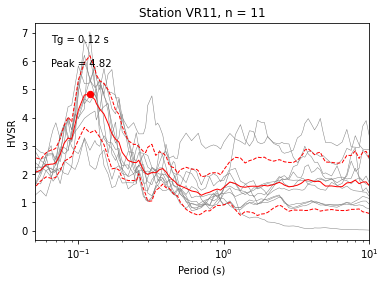

Match!


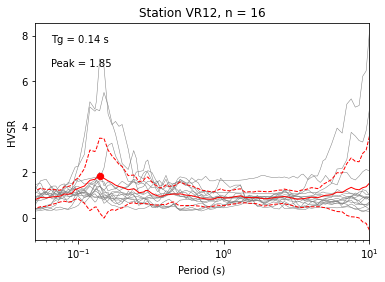

Match!


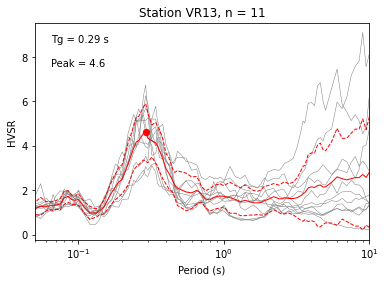

Match!


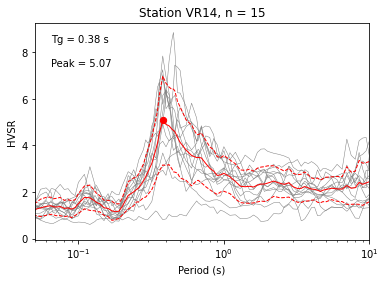

Match!


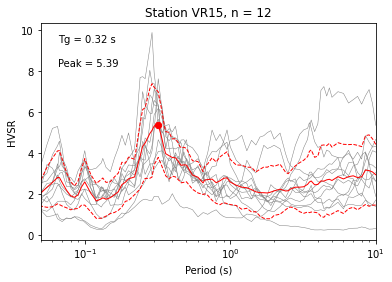

Match!


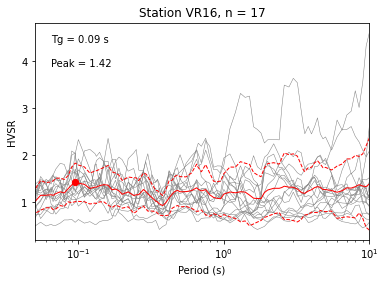

Match!


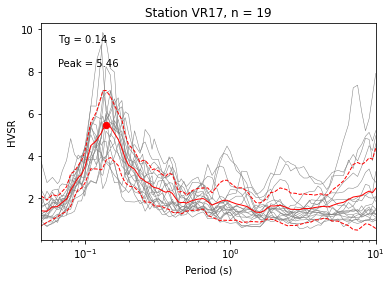

Match!


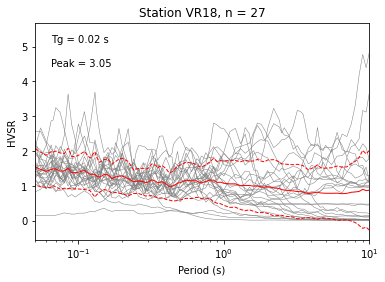

Match!


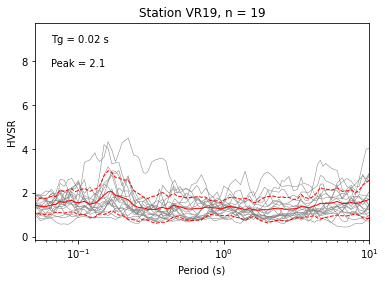

Match!


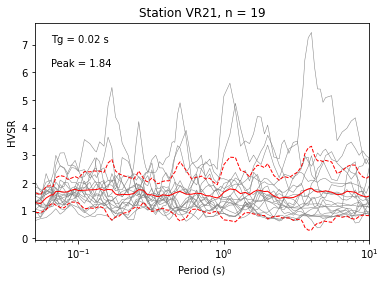

Match!


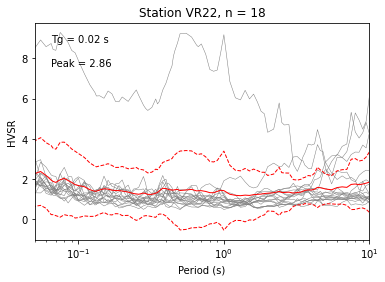

Match!


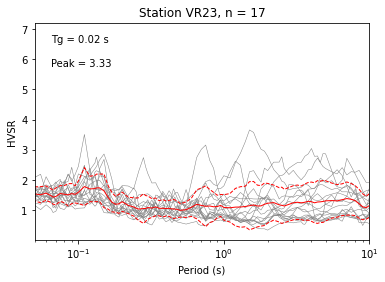

Match!


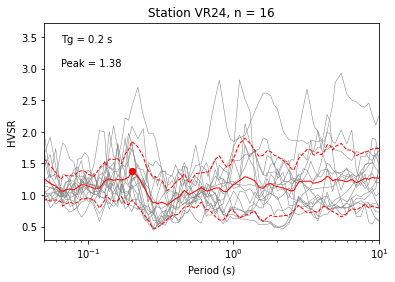

Match!


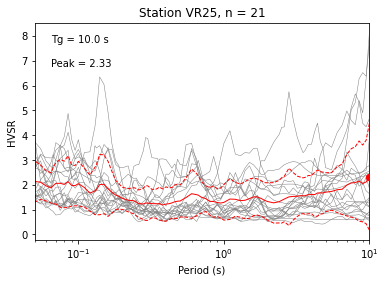

Match!


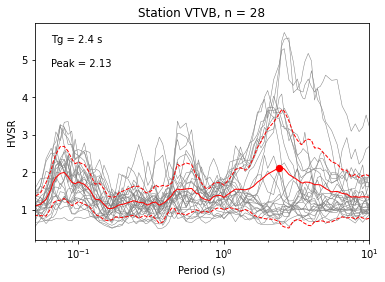

In [5]:
hvsrres = []
# for j in range(0,1):
for j in range(0,len(stal)):


    sta = stal[j]
    sahs = sah.query("STAID == '{}'".format(sta)).reset_index(drop=True)
    savs = sav.query("STAID == '{}'".format(sta)).reset_index(drop=True)
    stlat = sahs.stlat[0]
    stlon = sahs.stlon[0]

    if len(sahs) == len(savs):
        print("Match!")
        cols = sahs.columns[8:]
        hvrs = (sahs[cols]/savs[cols]).T.reset_index()
        hvrs["T"] = 1/hvrs['index'].str.split(expand=True)[0].astype(float)
        plt.figure()
        hvrs_rec = hvrs[hvrs.columns[1:-1]]
        s = ((hvrs[hvrs.columns[1:-1]] < 10) & (hvrs[hvrs.columns[1:-1]] > 0.01)).all()
        r_ok = s[s].index
        n = len(r_ok)
        for i in r_ok:
            plt.plot(hvrs["T"],hvrs[i],c="gray",linewidth=0.5)
    #     plt.yscale('log')
        hvrs_mean = hvrs[r_ok].mean(axis=1)
        hvrs_std = hvrs[r_ok].std(axis=1)
        plt.plot(hvrs["T"],hvrs_mean,c="red",linewidth=1)
        plt.plot(hvrs["T"],hvrs_mean+hvrs_std,c="red",linewidth=1,linestyle="--")
        plt.plot(hvrs["T"],hvrs_mean-hvrs_std,c="red",linewidth=1,linestyle="--")

        peak = hvrs_mean.max()
        try:
            peak_std = hvrs_std[hvrs_mean.idxmax()]
        except:
            peak_std = np.NaN
        Tg = hvrs["T"][hvrs_mean.idxmax()]
#         Tg_ = (hvrs["T"][hvrs_mean.idxmax()]+hvrs["T"][hvrs_mean.idxmax()-1])/2
        plt.scatter(Tg,peak,c="r",zorder=10,s=40)
        text = "Tg = {} s \n \nPeak = {}".format(round(Tg,2), round(peak,2))
        plt.text(0.05,0.8,text,transform=plt.gca().transAxes)
        plt.xscale('log')
        plt.xlabel("Period (s)")
        plt.ylabel("HVSR")
        plt.xlim(0.05,10)
        plt.title("Station {}, n = {}".format(sta,n))
        plt.savefig("../figs/hvsr/{}.pdf".format(sta))
        plt.show()
        hvsrr = {"sta":sta, "stlat":stlat, "stlon":stlon, "Tg": round(Tg,2), "peak":round(peak,2), "peak_std":round(peak_std,2), "n":n }
        hvsrres.append(hvsrr)
    else:
        print("Not Match")


In [11]:
dfhvsr = pd.DataFrame(hvsrres)
dfhvsr[["sta","stlon","stlat","n","Tg","peak","peak_std"]].to_csv("../data/sta.csv")
dfhvsr[["sta","stlon","stlat","n","Tg","peak","peak_std"]]

sta    stlon    stlat   n     Tg  peak  peak_std
0   BCVB  105.772  21.8850  13   0.08  2.30      1.22
1   BGVB  106.227  21.2902  10   0.11  4.25      2.53
2   BKVB  105.856  22.1500  15   0.07  3.08      0.68
3   CBVB  106.271  22.6599  23   2.00  1.69      0.90
4   CCVB  104.856  19.0570  20   0.55  1.34      0.37
..   ...      ...      ...  ..    ...   ...       ...
62  VR22  105.182  20.6960  18   0.02  2.86      1.79
63  VR23  105.094  20.6620  17   0.02  3.33      1.23
64  VR24  105.036  20.6030  16   0.20  1.38      0.47
65  VR25  104.973  20.5190  21  10.00  2.33      2.15
66  VTVB  104.899  22.2523  28   2.40  2.13      1.44

[67 rows x 7 columns]